# Polynomial Regression from scratch

## 1.0 Imports

In [340]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Suppressing the warnings

In [341]:
# for suppressing the warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1.2 Generating the data

In [349]:
np.random.seed(42)
X = np.random.rand(50, 1).reshape(50)
y = 5*((X)**(2)) + np.random.rand(50,1).reshape(50)

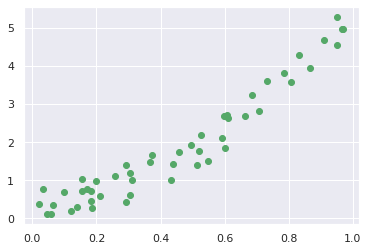

In [350]:
plt.scatter(X, y, color = "g");

## 2. Polynomial regression implementation

In [351]:
def polynomial_regression(input_vars = None,
                          output_vars = None,
                          order = 2,
                          learning_rate = 0.001,
                          iterations = 500,
                           verbose = True):
    
    # generating new features from the given data
    transformed_input_vars = np.zeros((input_vars.shape[0], order))
    for col in range(0, order):
        transformed_input_vars[:, col] = input_vars ** (col + 1)
        
    print("Features generated..")
    print("Shape of input vars: ", transformed_input_vars.shape)
    
    # initializing the weights and biases
    w = np.random.normal(loc = 0.0, scale = 0.02, size = (transformed_input_vars.shape[1]))
    b = np.random.normal(loc = 0.0, scale = 0.02, size = 1)
    
    total_points = transformed_input_vars.shape[0]
    
    print("Starting training...")
    print("-" * 100)
    print("\n" * 2)
    for step in range(0, iterations + 1):
        
        if verbose and step % 500 == 0:
            # calculating the loss
            y_pred = np.dot(transformed_input_vars, w) + b
            loss = np.mean((y_pred - y) ** 2)
            print(f"Iteration: {step}, Loss: {loss}")
        
        # computing the gradients of weights
        dw = (1 / total_points) * np.dot(transformed_input_vars.T, (y_pred - output_vars))
        # computing the gradients of biases
        db = (1 / total_points) * np.sum((y_pred - y))
        
        # updating the weights
        w -= learning_rate * dw
        b -= learning_rate * db


    y_pred =  np.dot(transformed_input_vars, w) + b
    plt.figure(figsize = (12, 8))
    plt.scatter(input_vars, output_vars, s = 20, label = "data")
    plt.scatter(input_vars, y_pred, s = 50, color = "red", marker = ".", label = "prediction")
    plt.legend(loc='best')
    plt.show()
    
    return w, b

## 3.0 Training the model

Training the polynomial regression model using a order of 4

Features generated..
Shape of input vars:  (50, 3)
Starting training...
----------------------------------------------------------------------------------------------------



Iteration: 0, Loss: 5.9386194470376585
Iteration: 500, Loss: 1.3677505792558478
Iteration: 1000, Loss: 0.8085040766540027
Iteration: 1500, Loss: 0.6560678823588553
Iteration: 2000, Loss: 0.5591827766246766
Iteration: 2500, Loss: 0.48124499735396936
Iteration: 3000, Loss: 0.4164748026291676
Iteration: 3500, Loss: 0.36243970481149085
Iteration: 4000, Loss: 0.31734027682691335
Iteration: 4500, Loss: 0.2796968714539027
Iteration: 5000, Loss: 0.24827661266207024
Iteration: 5500, Loss: 0.2220506541711671
Iteration: 6000, Loss: 0.20016026102538864
Iteration: 6500, Loss: 0.18188866826545272
Iteration: 7000, Loss: 0.1666376083674092
Iteration: 7500, Loss: 0.15390772080128864
Iteration: 8000, Loss: 0.14328220047980103
Iteration: 8500, Loss: 0.13441314949840588
Iteration: 9000, Loss: 0.12701018523899416
Iteration: 9500, Los

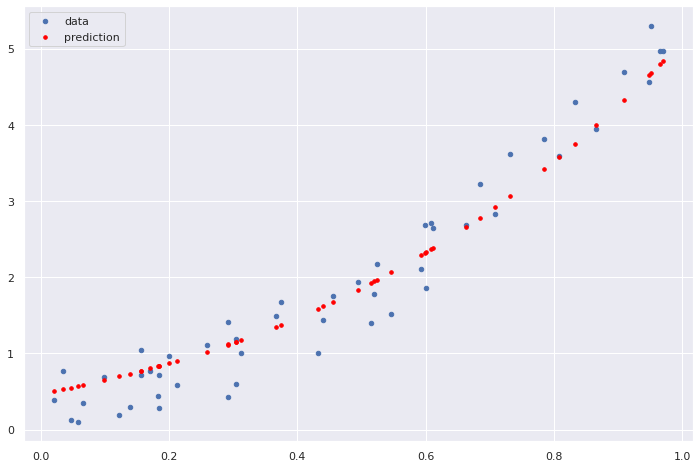

In [352]:
w, b = polynomial_regression(input_vars = X,
                            output_vars = y,
                            order = 3,
                            learning_rate = 0.001,
                            iterations = 10000)